# Table of Contents
 <p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import epistasis as epi

from matplotlib import rc

import os
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})


%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [2]:
strains =['ps4187', 'ps4087', 'ps4176', 'ew15', 'mt21245', 'mt4866','n2731', 'n2376', 'n767', 'n2731-n767', 'tm1489',
          'n3809', 'n3917', 'n745', 'n767-tm1489', 'n2731-tm1489',
          'ia4', 'ok1402', 'ok161', 'sa307', 'sa307-ok161', 'sa307-ia4',
          'q71']

strain_dict = {}
for i, g in enumerate(strains):
    strain_dict[g] = i

In [3]:
q = 0.01

In [4]:
genmap = pd.read_csv('../sleuth/rna_seq_info.txt', sep=' ', comment='#')
tidy  = pd.read_csv('../input/quantifications.csv')

In [5]:
def get_x_and_y_from_df(overlap, df, strain1, strain2):
    x = tidy[(tidy.strain==strain1) & (tidy.target_id.isin(overlap))].b.values
    y = tidy[(tidy.strain==strain2) & (tidy.target_id.isin(overlap))].b.values

    se_x = tidy[(tidy.strain==strain1) & (tidy.target_id.isin(overlap))].se_b.values
    se_y = tidy[(tidy.strain==strain2) & (tidy.target_id.isin(overlap))].se_b.values
    
    return x, y, se_x, se_y

In [6]:
overlap = epi.find_overlap(['ps4087', 'ps4187'], tidy)
overlap_ens_gene = tidy[(tidy.target_id.isin(overlap))].ens_gene.unique()
print(len(overlap))
n = len(tidy[(tidy.strain == 'ps4187') & (tidy.qval < q)].target_id.unique())
print(len(overlap)/n)

322
1.5707317073170732


The PS4187 (Weak Allele) has an effect size of 0.61x (+/- 0.018) of PS4087 (Strong Allele)


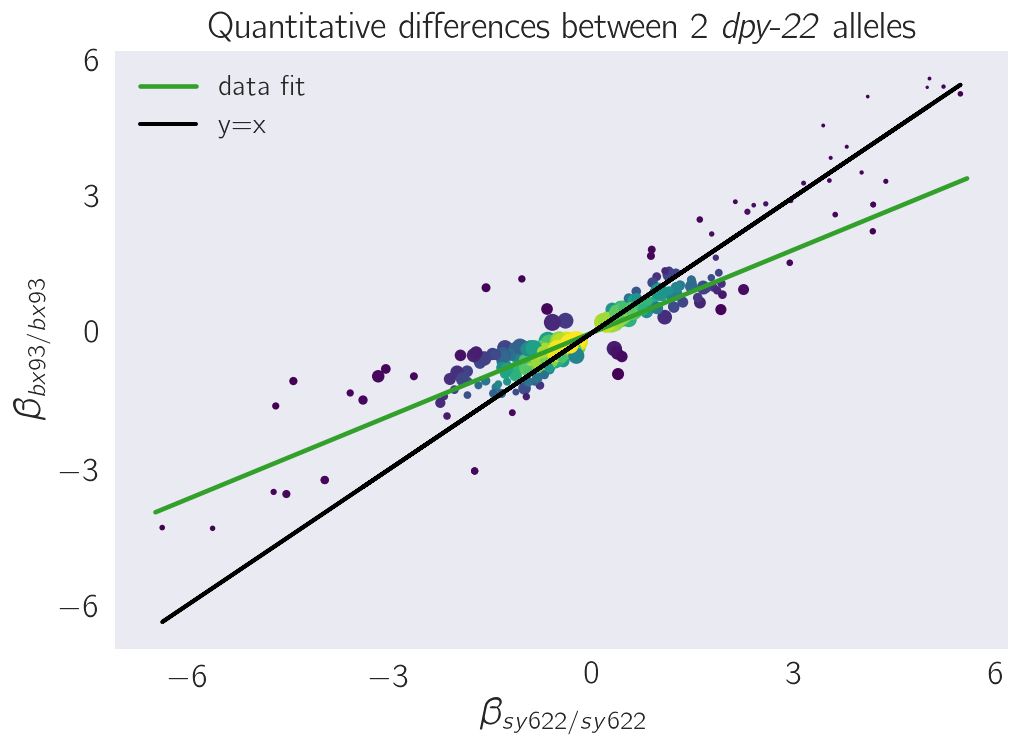

In [7]:
x, y, se_x, se_y = get_x_and_y_from_df(overlap, tidy, 'ps4087', 'ps4187')

odr = epi.perform_odr(x, y, se_x, se_y, beta0=[0.5])
epi.epiplot(x, y, se_y, s0=5, beta=odr.beta[0], alpha=1)
plt.plot(x, x, 'k', ls='-', label='y=x')

plt.legend()
plt.xlabel(r'$\beta_{sy622/sy622}$')
plt.ylabel(r'$\beta_{bx93/bx93}$')

plt.xticks([-6, -3, 0, 3, 6])
plt.yticks([-6, -3, 0, 3, 6])

plt.title('Quantitative differences between 2 \emph{dpy-22} alleles')

plt.savefig('../output/dpy22_strong_vs_weak_alleles.svg', bbox_inches='tight')
print('The PS4187 (Weak Allele) has an effect size of {0:.2g}x (+/- {1:.2g}) of PS4087 (Strong Allele)'.format(odr.beta[0], odr.sd_beta[0]))

The PS4176 trans-heterozygote is equivalent to the weak allele: 1  +/- 0.027


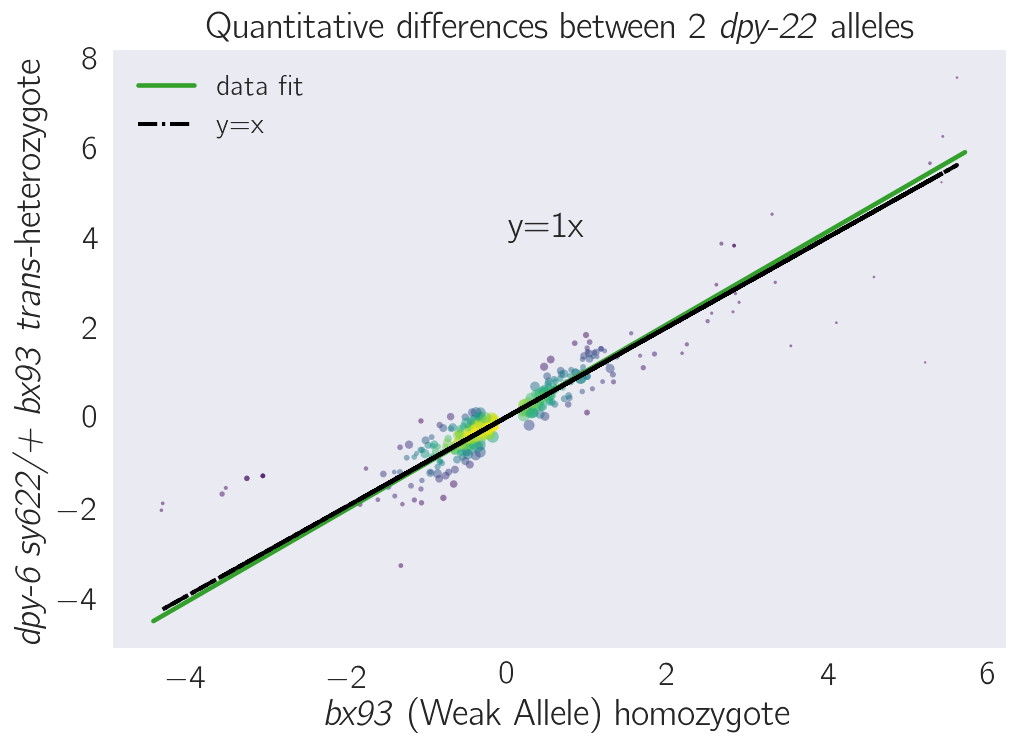

In [9]:
strain1 = 'ps4187'
strain2 = 'ps4176'

x, y, se_x, se_y = get_x_and_y_from_df(overlap, tidy, strain1, strain2)

odr = epi.perform_odr(x, y, se_x, se_y)
epi.epiplot(x, y, se_y, s0=2, beta=odr.beta[0])
plt.plot(x, x, 'k', ls='-.', label='y=x')
plt.annotate('y={0:.2g}x'.format(odr.beta[0]), (0, 4), fontsize=18)

plt.legend()
plt.xlabel('\emph{bx93} (Weak Allele) homozygote')
plt.ylabel('\emph{dpy-6 sy622/+ bx93} \emph{trans}-heterozygote')

plt.title('Quantitative differences between 2 \emph{dpy-22} alleles')

plt.savefig('../output/trans_het_vs_weak_allele.svg', bbox_inches='tight')
print('The PS4176 trans-heterozygote is equivalent to the weak allele: {0:.2g}  +/- {1:.2g}'.format(odr.beta[0], odr.sd_beta[0]))